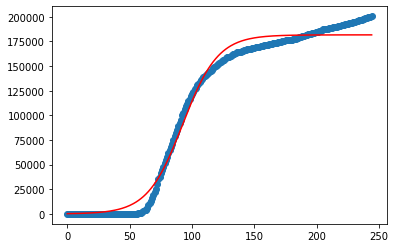

In [72]:
#Import packages
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

covid_df = pd.read_csv('covidCasesByCounty.csv')

# MAY NEED LATER
# def covid_cases_by_county(state_abr):
#   cases_by_county = covid_df.iloc[:, 4:].set_index([covid_df['County Name'], covid_df["State"]])
#   total_cases_by_county = cases_by_county.sum(axis=1)
#   total_county_cases_by_state = total_cases_by_county[:,state_abr]
#   return total_county_cases_by_state

# For class 10/1
def cases_by_state_over_time(state_abr):
  cases_by_state = covid_df.iloc[:, 4:].set_index(covid_df['State'])
  state_cases = cases_by_state.groupby('State').sum()
  state_cases_by_date = state_cases.loc[state_abr]
  return state_cases_by_date

#Logistic regression function
def logistic_curve ( x, β0, β1, β2 ):
    return β0 / ( 1 + np.exp( β1*(-x+β2) ) )

#Get y and x values
ys = cases_by_state_over_time( "NJ" )
xs = np.arange(len(ys))

# Finding coefficients for logistic model
my_guessed_betas = [ ys.max(), 1, len(ys)/2 ]
found_betas, covariance = curve_fit( logistic_curve, xs, ys, p0=my_guessed_betas )
β0, β1, β2 = found_betas
β0, β1, β2

# Plotting logisitic model on top of data
fit_model = lambda x: logistic_curve( x, β0, β1, β2 )
plt.scatter( xs, ys )
plt.plot( xs, fit_model( xs ), color='red' )
plt.show()



